<img src="images/logos/ClimKern-logo.png" width=250 alt="ClimKern Python Package Logo"></img>

# Feedbacks with ClimKern

---

## Overview

While it is good to know how to manually calculate radiative feedbacks, it is also time-consuming to constantly recreate the code. Here, we will use a new Python package called ClimKern that offers functions to calculate radiative feedbacks from climate model or reanalysis output. The advantages of using ClimKern go beyond making it simpler—it standardizes the methods and assumptions that go into these sometimes complicated calculations. We will use CMIP6 output in this notebook.

1. This is a numbered list of the specific topics
1. These should map approximately to your main sections of content
1. Or each second-level, `##`, header in your notebook
1. Keep the size and scope of your notebook in check
1. And be sure to let the reader know up front the important concepts they'll be leaving with

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Loading CMIP6 Data with Intake-ESM](https://projectpythia.org/cmip6-cookbook/notebooks/foundations/intake-esm.html) | Helpful | |

- **Time to learn**: < 5 minutes

---

## Imports

In [67]:
import climkern as ck
import intake
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare the Data

To start, we will need some CMIP6 data to calculate feedbacks. We will use the 1×CO$_2$ and 4×CO$_2$ experiments from just one model.

In [60]:
# Make a list of variables and experiments we need
var_list = ["rsds","rsus"]
exp_list = ["piControl","abrupt-4xCO2"]

# Specify data location, open it
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)

# Create a catalog of matching simulations
cat = col.search(experiment_id=exp_list,source_id="CESM2",variable_id=var_list,
                table_id="Amon")

# Convert to a dictionary of Xarray Datasets
ds_dict = cat.to_dataset_dict(zarr_kwargs={'consolidated': True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [61]:
ctrl = ds_dict["CMIP.NCAR.CESM2.piControl.Amon.gn"].isel(
    time=slice(-600,None))
pert = ds_dict["CMIP.NCAR.CESM2.abrupt-4xCO2.Amon.gn"].isel(
    time=slice(-360,None))

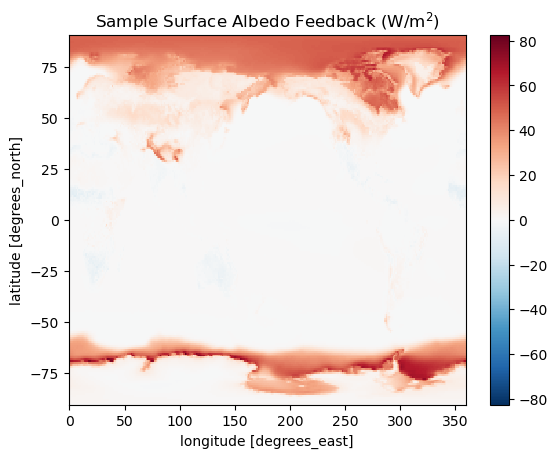

In [72]:
ck.calc_alb_feedback(ctrl.rsus,ctrl.rsds,pert.rsus,pert.rsds,
                    kern="ERA5").squeeze().mean(dim="time").plot()
plt.title("Sample Surface Albedo Feedback (W/m$^2$)")
plt.show()

### A content subsection
Divide and conquer your objectives with Markdown subsections, which will populate the helpful navbar in Jupyter Lab and here on the Jupyter Book!

In [ ]:
# some subsection code
new = "helpful information"

### Another content subsection
Keep up the good work! A note, *try to avoid using code comments as narrative*, and instead let them only exist as brief clarifications where necessary.

## Your second content section
Here we can move on to our second objective, and we can demonstrate

### Subsection to the second section

#### a quick demonstration

##### of further and further

###### header levels

as well $m = a * t / h$ text! Similarly, you have access to other $\LaTeX$ equation [**functionality**](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html) via MathJax (demo below from link),

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

Check out [**any number of helpful Markdown resources**](https://www.markdownguide.org/basic-syntax/) for further customizing your notebooks and the [**Jupyter docs**](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html) for Jupyter-specific formatting information. Don't hesitate to ask questions if you have problems getting it to look *just right*.

## Last Section

If you're comfortable, and as we briefly used for our embedded logo up top, you can embed raw html into Jupyter Markdown cells (edit to see):

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Your relevant information here!
</div>

Feel free to copy this around and edit or play around with yourself. Some other `admonitions` you can put in:

<div class="admonition alert alert-success">
    <p class="admonition-title" style="font-weight:bold">Success</p>
    We got this done after all!
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Be careful!
</div>

<div class="admonition alert alert-danger">
    <p class="admonition-title" style="font-weight:bold">Danger</p>
    Scary stuff be here.
</div>

We also suggest checking out Jupyter Book's [brief demonstration](https://jupyterbook.org/content/metadata.html#jupyter-cell-tags) on adding cell tags to your cells in Jupyter Notebook, Lab, or manually. Using these cell tags can allow you to [customize](https://jupyterbook.org/interactive/hiding.html) how your code content is displayed and even [demonstrate errors](https://jupyterbook.org/content/execute.html#dealing-with-code-that-raises-errors) without altogether crashing our loyal army of machines!

---

## Summary
Add one final `---` marking the end of your body of content, and then conclude with a brief single paragraph summarizing at a high level the key pieces that were learned and how they tied to your objectives. Look to reiterate what the most important takeaways were.

### What's next?
Let Jupyter book tie this to the next (sequential) piece of content that people could move on to down below and in the sidebar. However, if this page uniquely enables your reader to tackle other nonsequential concepts throughout this book, or even external content, link to it here!

## Resources and references
Finally, be rigorous in your citations and references as necessary. Give credit where credit is due. Also, feel free to link to relevant external material, further reading, documentation, etc. Then you're done! Give yourself a quick review, a high five, and send us a pull request. A few final notes:
 - `Kernel > Restart Kernel and Run All Cells...` to confirm that your notebook will cleanly run from start to finish
 - `Kernel > Restart Kernel and Clear All Outputs...` before committing your notebook, our machines will do the heavy lifting
 - Take credit! Provide author contact information if you'd like; if so, consider adding information here at the bottom of your notebook
 - Give credit! Attribute appropriate authorship for referenced code, information, images, etc.
 - Only include what you're legally allowed: **no copyright infringement or plagiarism**
 
Thank you for your contribution!